In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix 

### Data Load and Label Encoding

In [2]:
dataset = pd.read_csv("DataSet.csv")
#dataset.head()

from sklearn.preprocessing import LabelEncoder
LbEncode = LabelEncoder()

dataset["date_of_Payment"] = LbEncode.fit_transform(dataset["date_of_Payment"])
dataset["branch_ID"] = LbEncode.fit_transform(dataset["branch_ID"])
dataset["bank_ID"] = LbEncode.fit_transform(dataset["bank_ID"])
#dataset["transaction_ID"] = LbEncode.fit_transform(dataset["transaction_ID"])
dataset["mode_of_Transfer1"] = LbEncode.fit_transform(dataset["mode_of_Transfer1"])
dataset["date_of_Submission"] = LbEncode.fit_transform(dataset["date_of_Submission"])
dataset["invoice_Due_Date"] = LbEncode.fit_transform(dataset["invoice_Due_Date"])
dataset["remittance_Number"] = LbEncode.fit_transform(dataset["remittance_Number"])
dataset["mode_of_Transfer2"] = LbEncode.fit_transform(dataset["mode_of_Transfer2"])
dataset["status"] = LbEncode.fit_transform(dataset["status"])

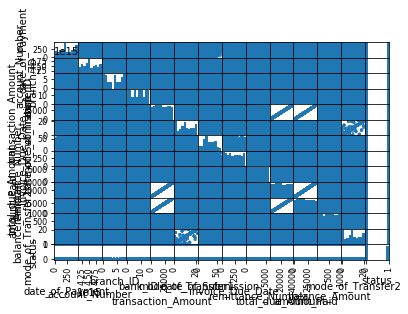

In [4]:
#dataset.head()
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
scatter_matrix(dataset)
pyplot.show()

In [4]:
X = dataset.iloc[:, [0,1,2,3,5,6,7,8,9,10,11,12,13]]
y = dataset.iloc[:, [14]]

### Data separation for Training and Testing 

In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [6]:
#Code to perform Validation check on the dataset.
#train, validation = train_test_split(data, test_size=0.50, random_state = 5)
X.shape

(5850, 13)

### KNeighborsClassifier

In [7]:
# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)

C:\Users\shubham.f.jain\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


### Extracted the values of the Confustion Matrix

In [8]:
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions)
cm

array([[346, 286],
       [292, 246]], dtype=int64)

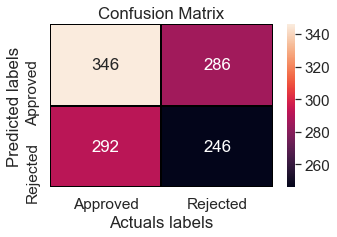

In [54]:
import seaborn as sns
plt.figure(figsize = (5,3))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', linecolor ='black', linewidths = 1);
# labels, title and ticks
ax.set_xlabel('Actuals labels');
ax.set_ylabel('Predicted labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Approved', 'Rejected']); 
ax.yaxis.set_ticklabels(['Approved', 'Rejected']);

## Accuracy of our KNN Model

In [55]:
accuracy = knn.score(X_test, y_test)
accuracy

0.505982905982906

In [10]:
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.54      0.55      0.54       632
           1       0.46      0.46      0.46       538

    accuracy                           0.51      1170
   macro avg       0.50      0.50      0.50      1170
weighted avg       0.51      0.51      0.51      1170



In [11]:
recall = np.diag(cm) / np.sum(cm, axis = 1)
recall[0]

0.5474683544303798

In [12]:
from sklearn.svm import SVC
my_svm = SVC(C = 0.1, gamma = 0.1, kernel = "rbf")
my_svm.fit(X_train, y_train)

C:\Users\shubham.f.jain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
corr = dataset.corr()

In [13]:
corr

,date_of_Payment,account_Number,branch_ID,bank_ID,transaction_Amount,mode_of_Transfer1,date_of_Submission,invoice_Due_Date,remittance_Number,total_due_Amount,amount_Paid,balance_Amount,mode_of_Transfer2,status
date_of_Payment,1.000000,-0.001885,-0.011668,0.014648,0.002120,0.021776,0.312280,-0.112440,-0.004282,0.002835,0.002120,0.029144,0.017908,-0.008993
account_Number,-0.001885,1.000000,0.003283,0.005423,-0.006598,0.003423,-0.017094,-0.002747,0.001825,-0.006461,-0.006598,0.005749,0.002361,0.003551
branch_ID,-0.011668,0.003283,1.000000,-0.011827,-0.009921,-0.008350,0.003834,-0.002020,-0.012443,-0.009445,-0.009921,0.019706,-0.003485,-0.014943
bank_ID,0.014648,0.005423,-0.011827,1.000000,-0.030968,-0.008166,0.015111,-0.012052,0.011805,-0.030949,-0.030968,0.001538,-0.005102,0.003158
transaction_Amount,0.002120,-0.006598,-0.009921,-0.030968,1.000000,0.002936,0.000911,0.012544,-0.002645,0.999700,1.000000,-0.036771,0.005631,0.013930
mode_of_Transfer1,0.021776,0.003423,-0.008350,-0.008166,0.002936,1.000000,-0.011447,-0.002248,-0.018333,0.003500,0.002936,0.022964,0.976809,-0.005730
date_of_Submission,0.312280,-0.017094,0.003834,0.015111,0.000911,-0.011447,1.000000,-0.246248,-0.014231,0.000962,0.000911,0.002030,-0.015279,-0.001210
invoice_Due_Date,-0.112440,-0.002747,-0.002020,-0.012052,0.012544,-0.002248,-0.246248,1.000000,-0.009788,0.012690,0.012544,0.005650,-0.001498,-0.027828
remittance_Number,-0.004282,0.001825,-0.012443,0.011805,-0.002645,-0.018333,-0.014231,-0.009788,1.000000,-0.002502,-0.002645,0.005872,-0.018660,0.004616
total_due_Amount,0.002835,-0.006461,-0.009445,-0.030949,0.999700,0.003500,0.000962,0.012690,-0.002502,1.000000,0.999700,-0.012303,0.006180,0.014215


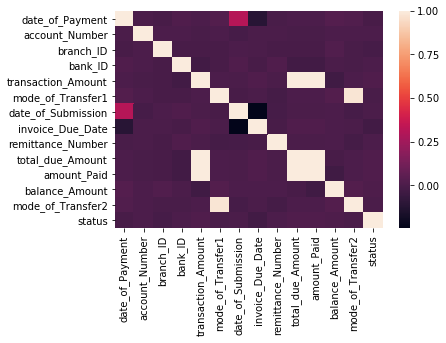

In [14]:
import seaborn as sns
sns.heatmap(corr)

### DescisionTreeClassifier

In [22]:
# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 

In [26]:
# creating a confusion matrix 
cm = confusion_matrix(y_test, dtree_predictions) 
cm

array([[505, 127],
       [423, 115]], dtype=int64)

In [27]:
print(classification_report(y_test, dtree_predictions))

              precision    recall  f1-score   support

           0       0.54      0.80      0.65       632
           1       0.48      0.21      0.29       538

    accuracy                           0.53      1170
   macro avg       0.51      0.51      0.47      1170
weighted avg       0.51      0.53      0.49      1170



### Naive Bayes classifier 

In [19]:
# training a Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 

C:\Users\shubham.f.jain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
# accuracy on X_test 
accuracy = gnb.score(X_test, y_test) 
accuracy 

0.5384615384615384

In [21]:
# creating a confusion matrix 
cm = confusion_matrix(y_test, gnb_predictions)
cm

array([[629,   3],
       [537,   1]], dtype=int64)

In [29]:
print(classification_report(y_test, gnb_predictions))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       632
           1       0.25      0.00      0.00       538

    accuracy                           0.54      1170
   macro avg       0.39      0.50      0.35      1170
weighted avg       0.41      0.54      0.38      1170



### logistic regression model

In [30]:
from sklearn.linear_model import LogisticRegression
#create a new logistic regression model
log_reg = LogisticRegression()
#fit the model to the training data
log_reg.fit(X_train, y_train)

C:\Users\shubham.f.jain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shubham.f.jain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
log_prec = log_reg.predict(X_test)  
print(classification_report(y_test, log_prec))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       632
           1       0.00      0.00      0.00       538

    accuracy                           0.54      1170
   macro avg       0.27      0.50      0.35      1170
weighted avg       0.29      0.54      0.38      1170



C:\Users\shubham.f.jain\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [33]:
print(confusion_matrix(y_test,log_prec))

[[632   0]
 [538   0]]
